In [ ]:
from bs4 import BeautifulSoup

In [ ]:
! ls

1.html	sample_data


In [ ]:
soup = BeautifulSoup(open("1.html",encoding="utf8"), "html.parser")

In [ ]:
movie_containers = soup.find_all('div' , class_ = 'review-container')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
1124


In [ ]:
first_movie = movie_containers[0]
first_movie.a.text

" Finally, a Show that stays true to it's written roots\n"

In [ ]:
temp = first_movie.span.text

In [ ]:
temp

'\n\n\n\n\n\n9/10\n'

In [ ]:
# Lists to store the scraped data in
reviews = []
ratings = []

# Extract data from individual movie container
for container in movie_containers:

    #review
    review = container.a.text
    reviews.append(review)

    #rating
    rating = container.span.text
    ratings.append(rating)

In [ ]:
import pandas as pd
import numpy as np

test_df = pd.DataFrame({'Review': reviews,'Rating': ratings})
print(test_df.info())
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1124 non-null   object
 1   Rating  1124 non-null   object
dtypes: object(2)
memory usage: 17.7+ KB
None


,Review,Rating
0,"Finally, a Show that stays true to it's writt...",\n\n\n\n\n\n9/10\n
1,Excellent adaptation.\n,\n\n\n\n\n\n10/10\n
2,One of the most stunning shows on television\n,\n\n\n\n\n\n10/10\n
3,Lord of the Rings - I think not!\n,\n\n\n\n\n\n10/10\n
4,Fantasy has never seemed so real\n,\n\n\n\n\n\n10/10\n


In [ ]:
test_df.loc[:, 'Rating'] = test_df['Rating'].str[6:8]

In [ ]:
test_df.loc[:, 'Rating'] = test_df['Rating'].str.replace('/', '')
test_df.loc[:, 'Review'] = test_df['Review'].str.replace('\n', '')
test_df.loc[:, 'Rating'] = test_df['Rating'].str.replace('-', '')

In [ ]:
import re
def split_it(rating):
    return re.sub('[a-zA-Z]+','NaN', rating)

In [ ]:
test_df['Rating'] = test_df['Rating'].apply(split_it)

In [ ]:
test_df = test_df[test_df.Rating.str.contains("NaN") == False]

In [ ]:
test_df['Rating'] = test_df['Rating'].apply(pd.to_numeric)

In [ ]:
test_df.head()

,Review,Rating
0,"Finally, a Show that stays true to it's writt...",9.0
1,Excellent adaptation.,10.0
2,One of the most stunning shows on television,10.0
3,Lord of the Rings - I think not!,10.0
4,Fantasy has never seemed so real,10.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: ylabel='count'>

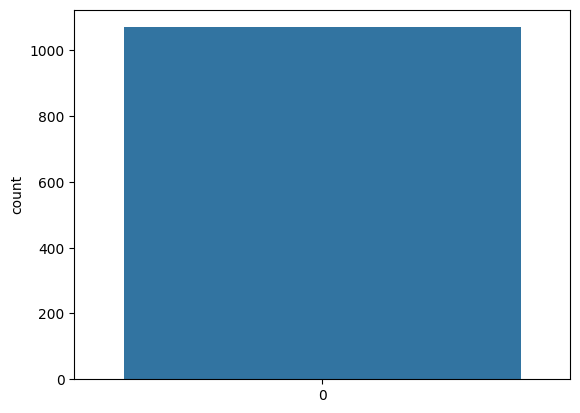

In [ ]:
sns.countplot(test_df['Rating'])

In [ ]:
test_df = test_df[test_df.Rating <= 10]

<Axes: ylabel='count'>

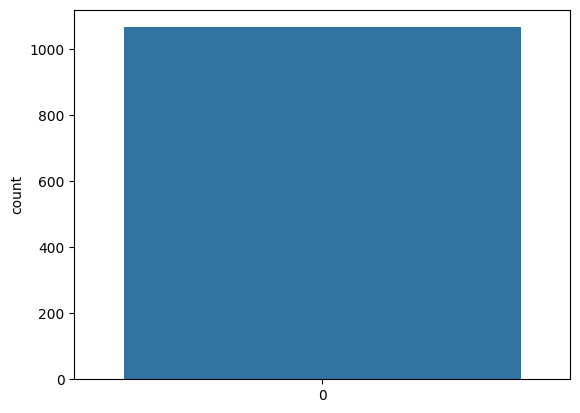

In [ ]:
sns.countplot(test_df['Rating'])

In [ ]:
test_df.describe()

,Rating
count,1065.000000
mean,8.071362
std,3.015090
min,1.000000
25%,7.000000
50%,10.000000
75%,10.000000
max,10.000000


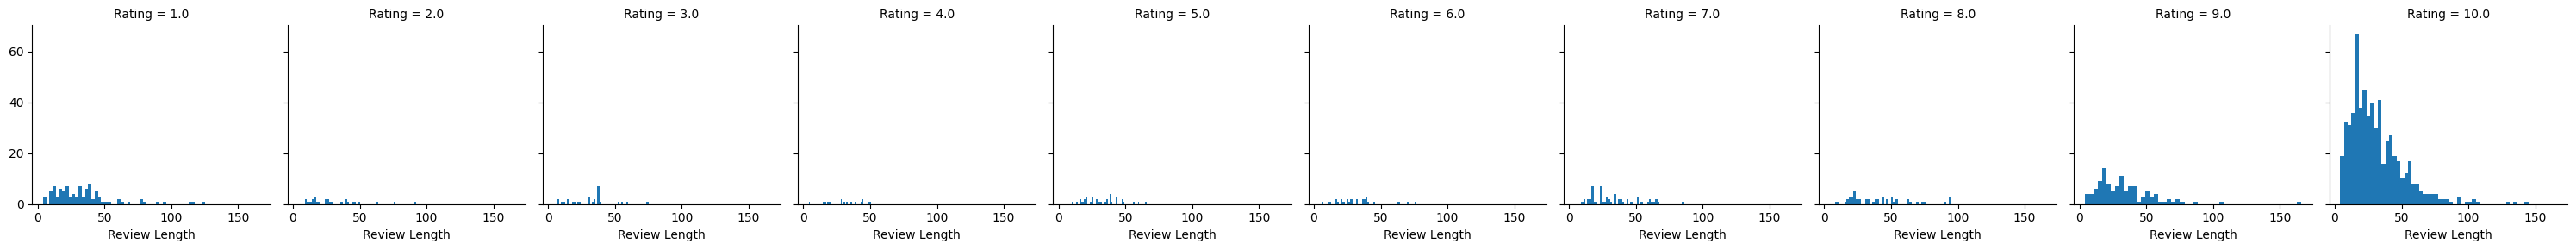

In [ ]:
test_df['Review']=test_df['Review'].astype(str)
test_df['Review Length']=test_df['Review'].apply(len)

g = sns.FacetGrid(data=test_df, col='Rating')
g.map(plt.hist, 'Review Length', bins=50)

<Axes: xlabel='Rating', ylabel='Review Length'>

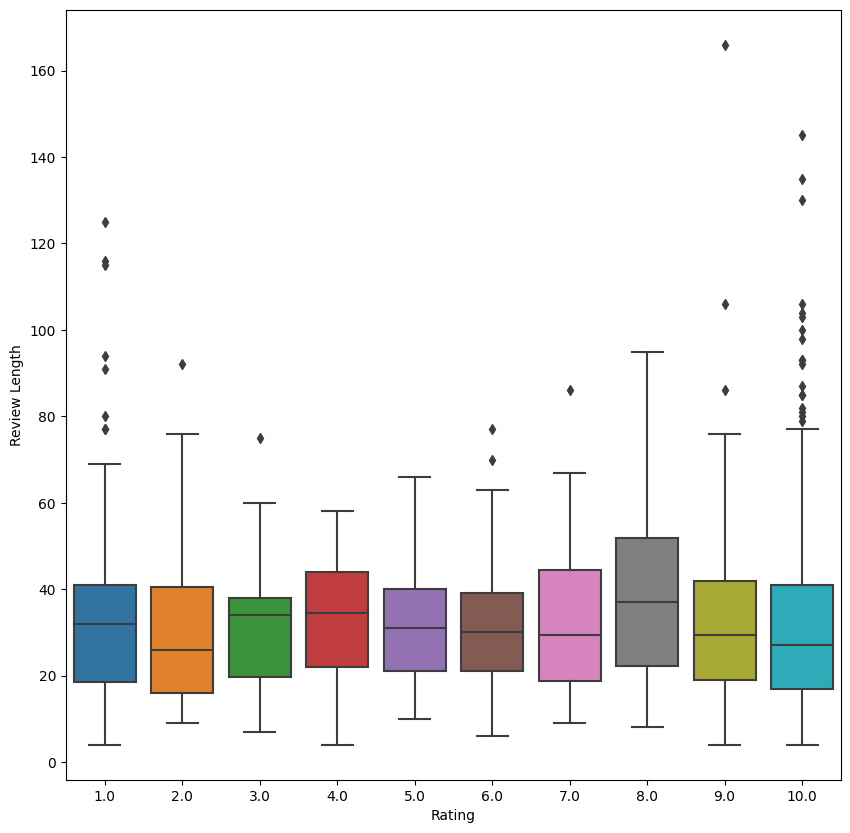

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Rating', y='Review Length', data=test_df)

In [ ]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
a = test_df['Review'].str.lower().str.cat(sep=' ')

In [ ]:
# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

In [ ]:
#remove all the stopwords from the text
stop_words = list(stopwords.words('english'))

newStopWords = ['game','thrones', 'bran', 'stark', 'dragons']
stop_words.extend(newStopWords)

In [ ]:
word_tokens = word_tokenize(b)

In [ ]:
len(word_tokens)

6030

In [ ]:
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

In [ ]:
len(filtered_sentence)

3608

In [ ]:
# Remove characters which have length less than 2
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]

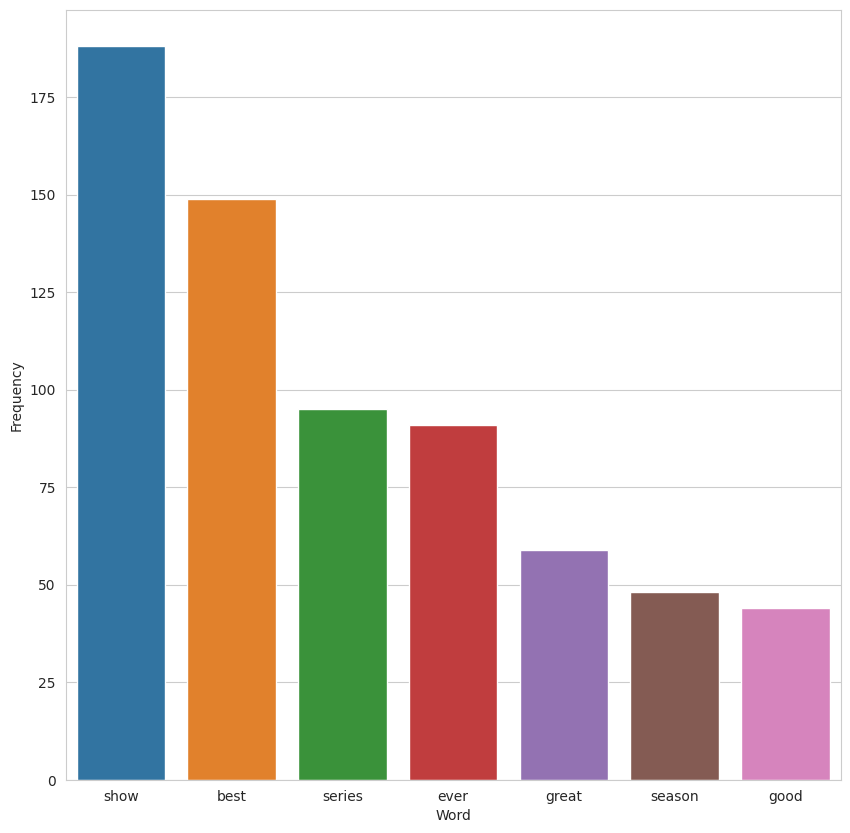

In [ ]:
top_N = 100
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

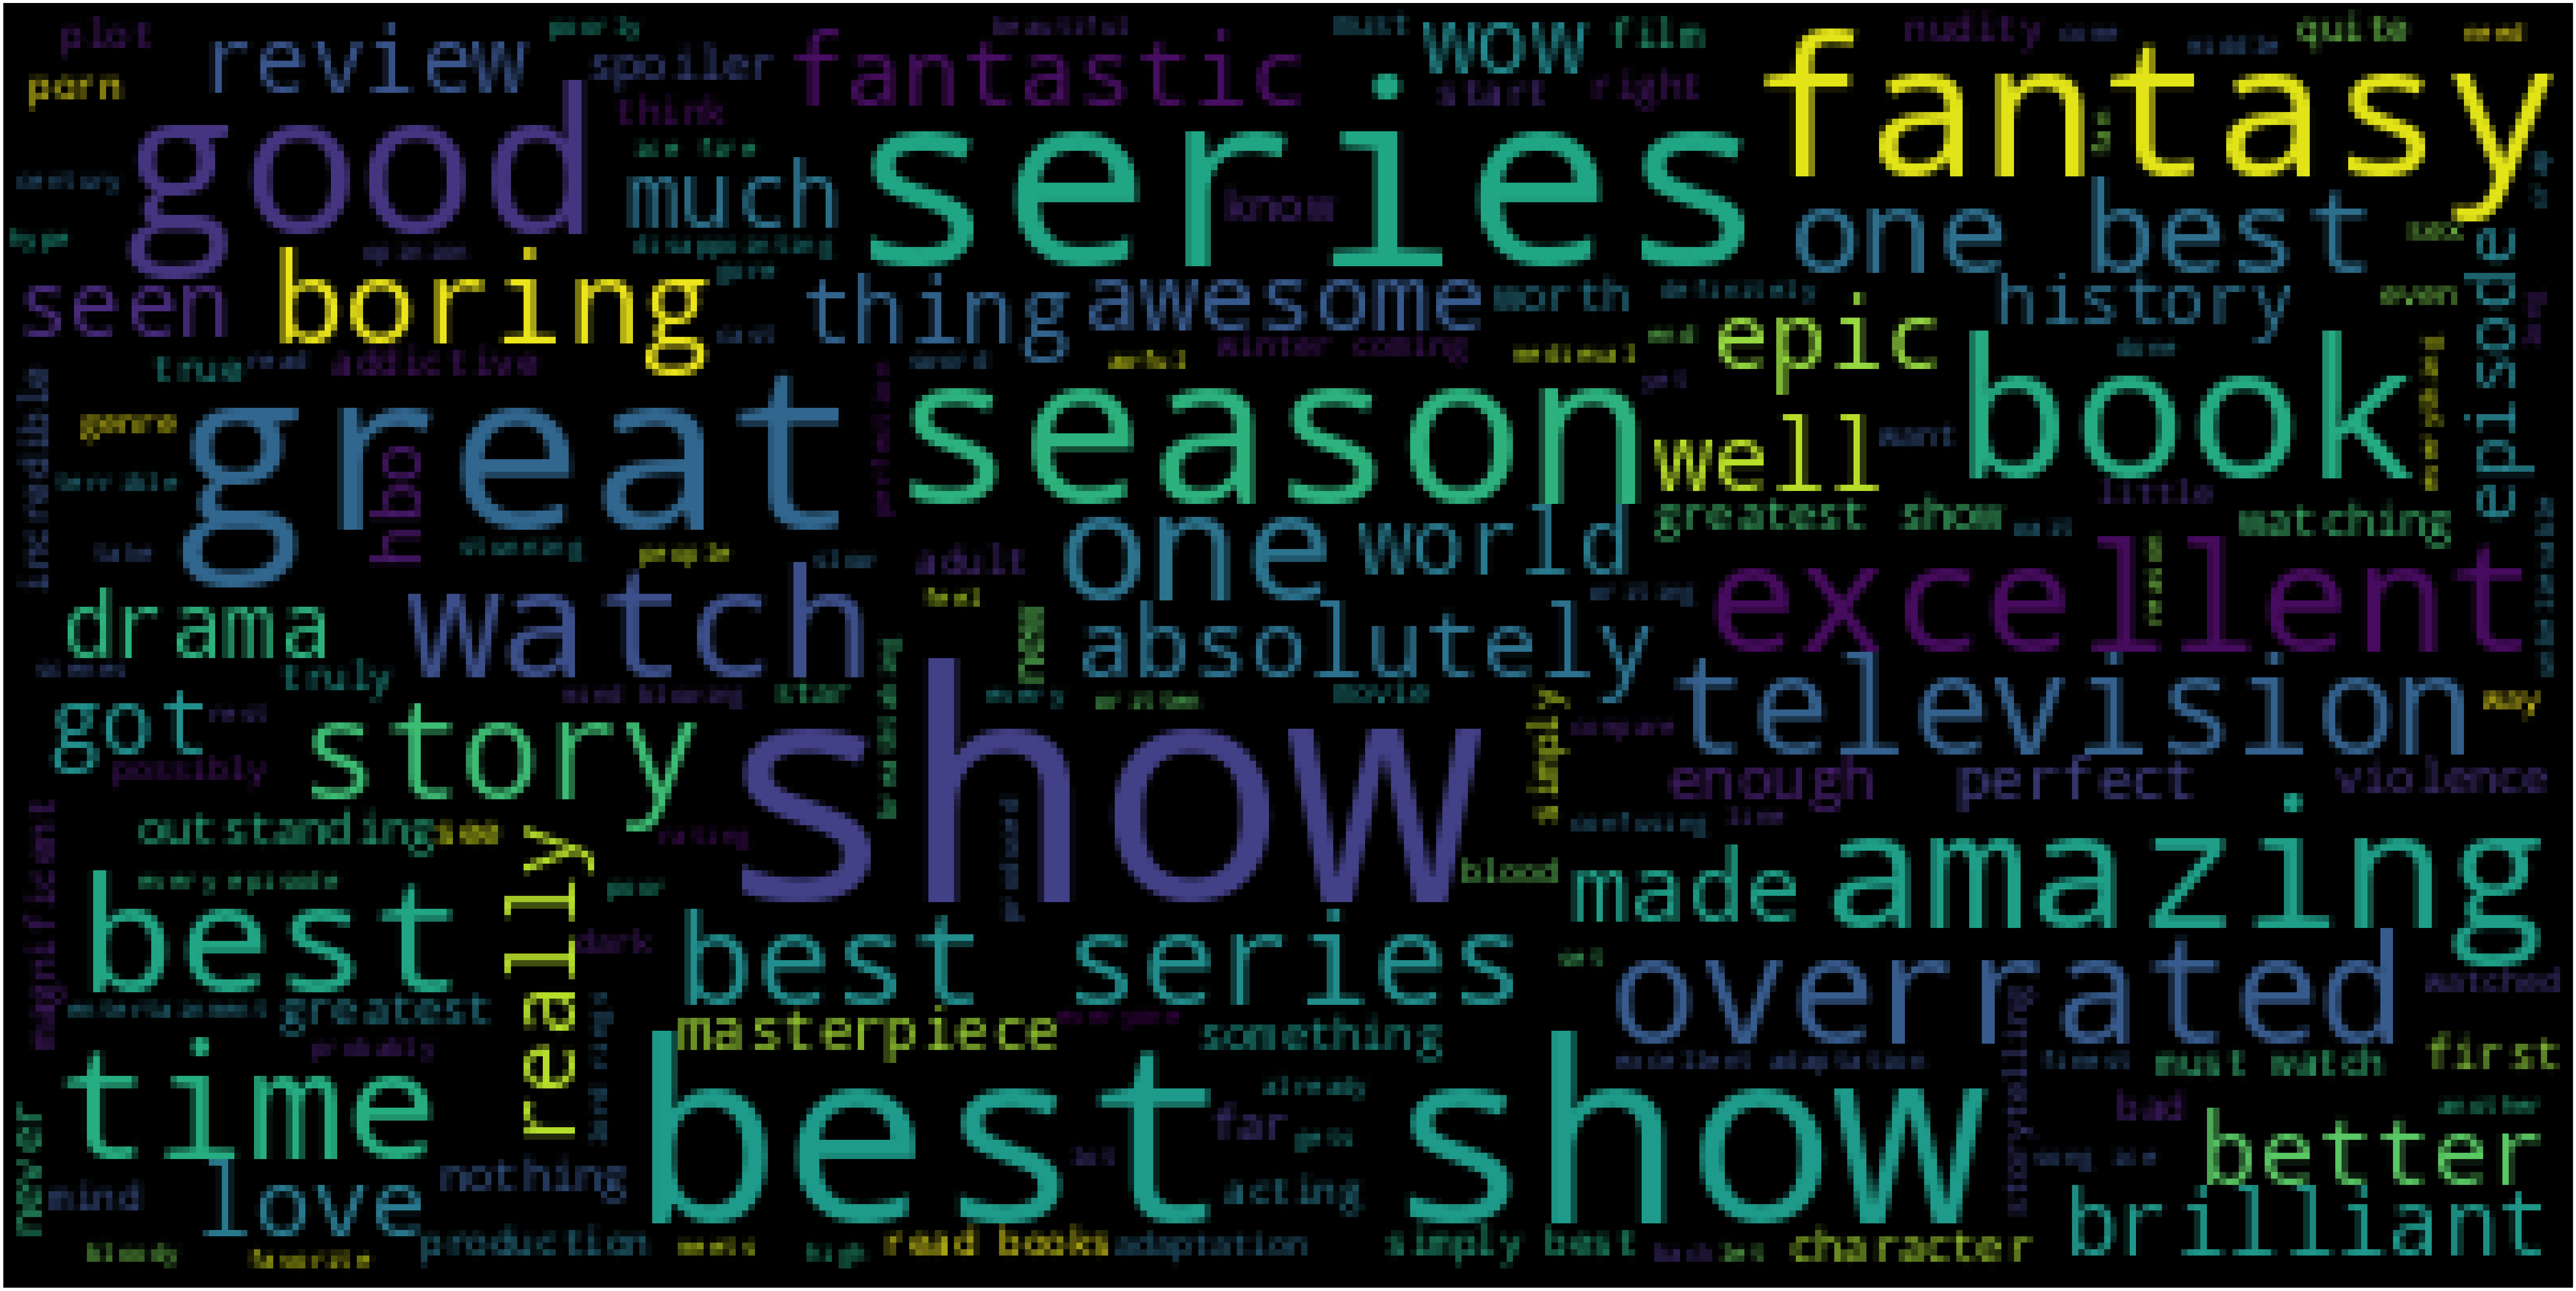

In [ ]:
wc(cleaned_data_title,'black','Most Used Words')

In [ ]:
from textblob import TextBlob

bloblist_desc = list()

df_review_str=test_df['Review'].astype(str)

In [ ]:
for row in df_review_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['Review','sentiment','polarity'])

In [ ]:
df_polarity_desc.head()

,Review,sentiment,polarity
0,"Finally, a Show that stays true to it's writt...",0.175,0.825
1,Excellent adaptation.,1.000,1.000
2,One of the most stunning shows on television,0.500,0.750
3,Lord of the Rings - I think not!,0.000,0.000
4,Fantasy has never seemed so real,0.200,0.300


In [ ]:
def f(df_polarity_desc):
    if df_polarity_desc['sentiment'] >= 0:
        val = "Positive Review"
    elif df_polarity_desc['sentiment'] >= -0.09:
        val = "Neutral Review"
    else:
        val = "Negative Review"
    return val

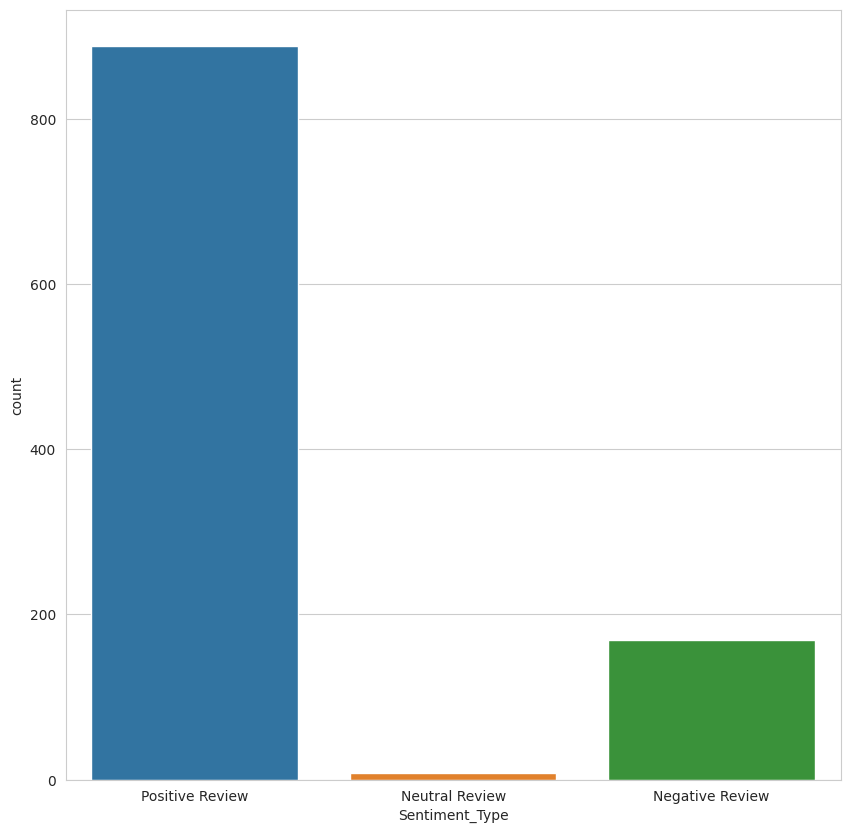

In [ ]:
df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)

In [ ]:
positive_reviews=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Positive Review']
negative_reviews=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Negative Review']

In [ ]:
negative_reviews.head()

,Review,sentiment,polarity,Sentiment_Type
15,Heads up for GAME OF THRONES,-0.400000,0.400000,Negative Review
22,"As expected, some will love it, some will hat...",-0.133333,0.633333,Negative Review
36,Possibly the worst storyline I will ever enco...,-0.500000,1.000000,Negative Review
42,On finding Game of Thrones on VHS,-0.400000,0.400000,Negative Review
43,Unbelievably awful,-1.000000,1.000000,Negative Review


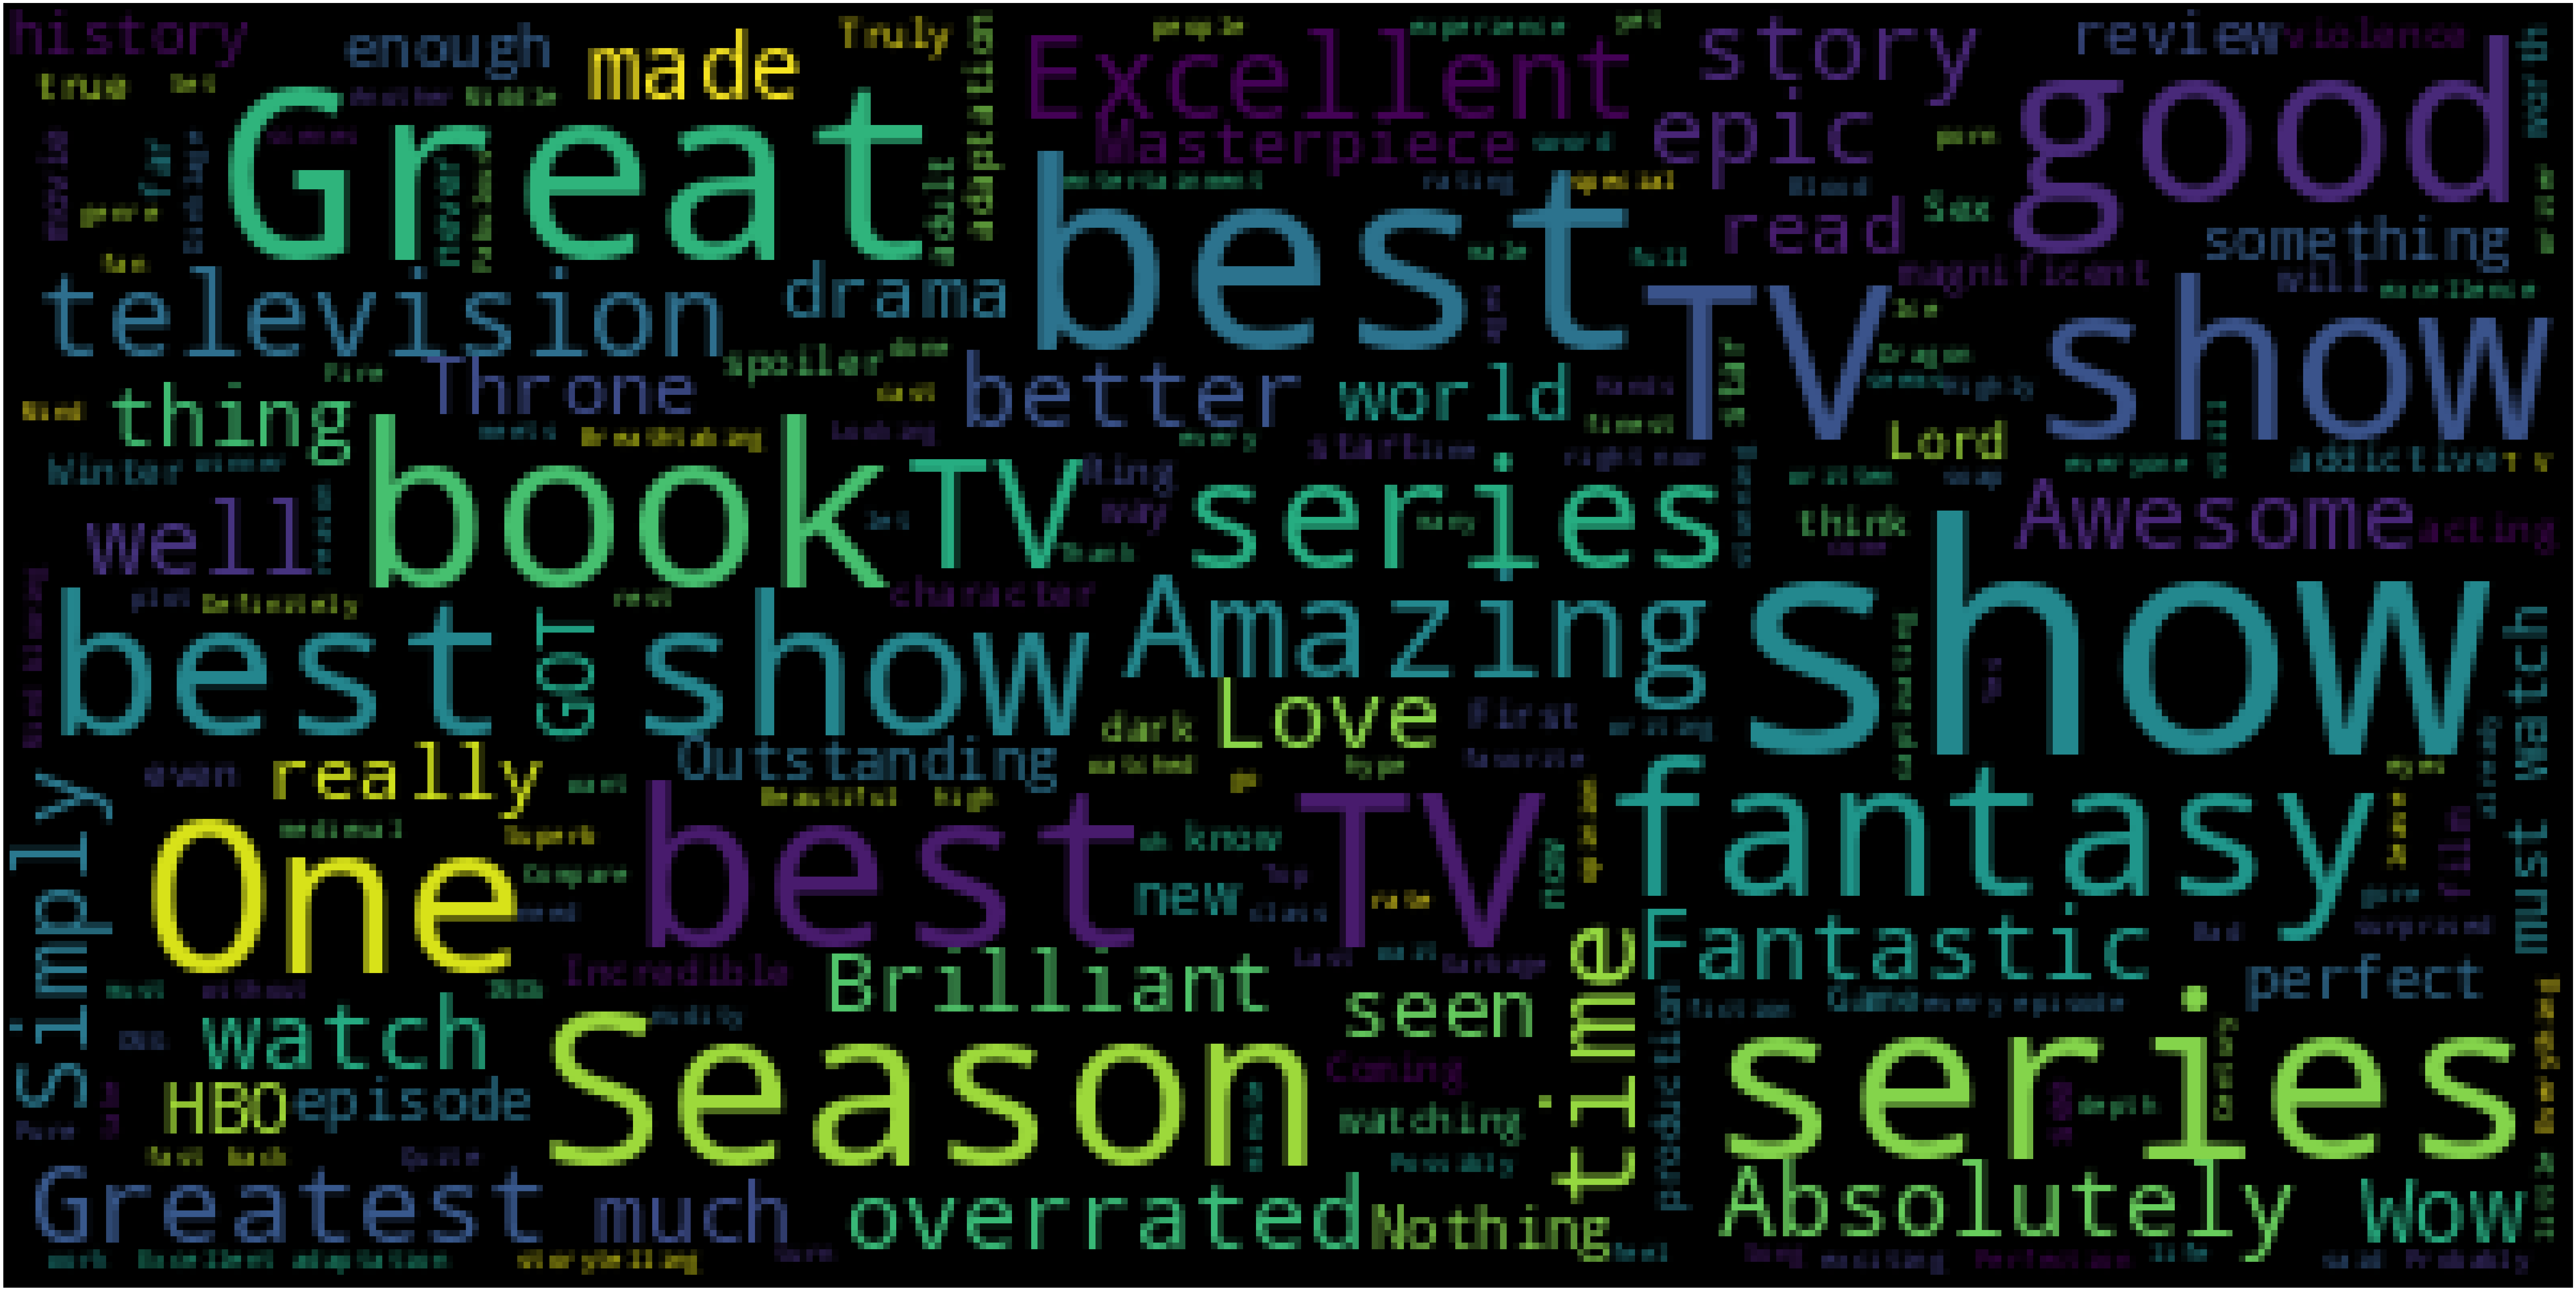

In [ ]:
wc(positive_reviews['Review'],'black','Most Used Words')

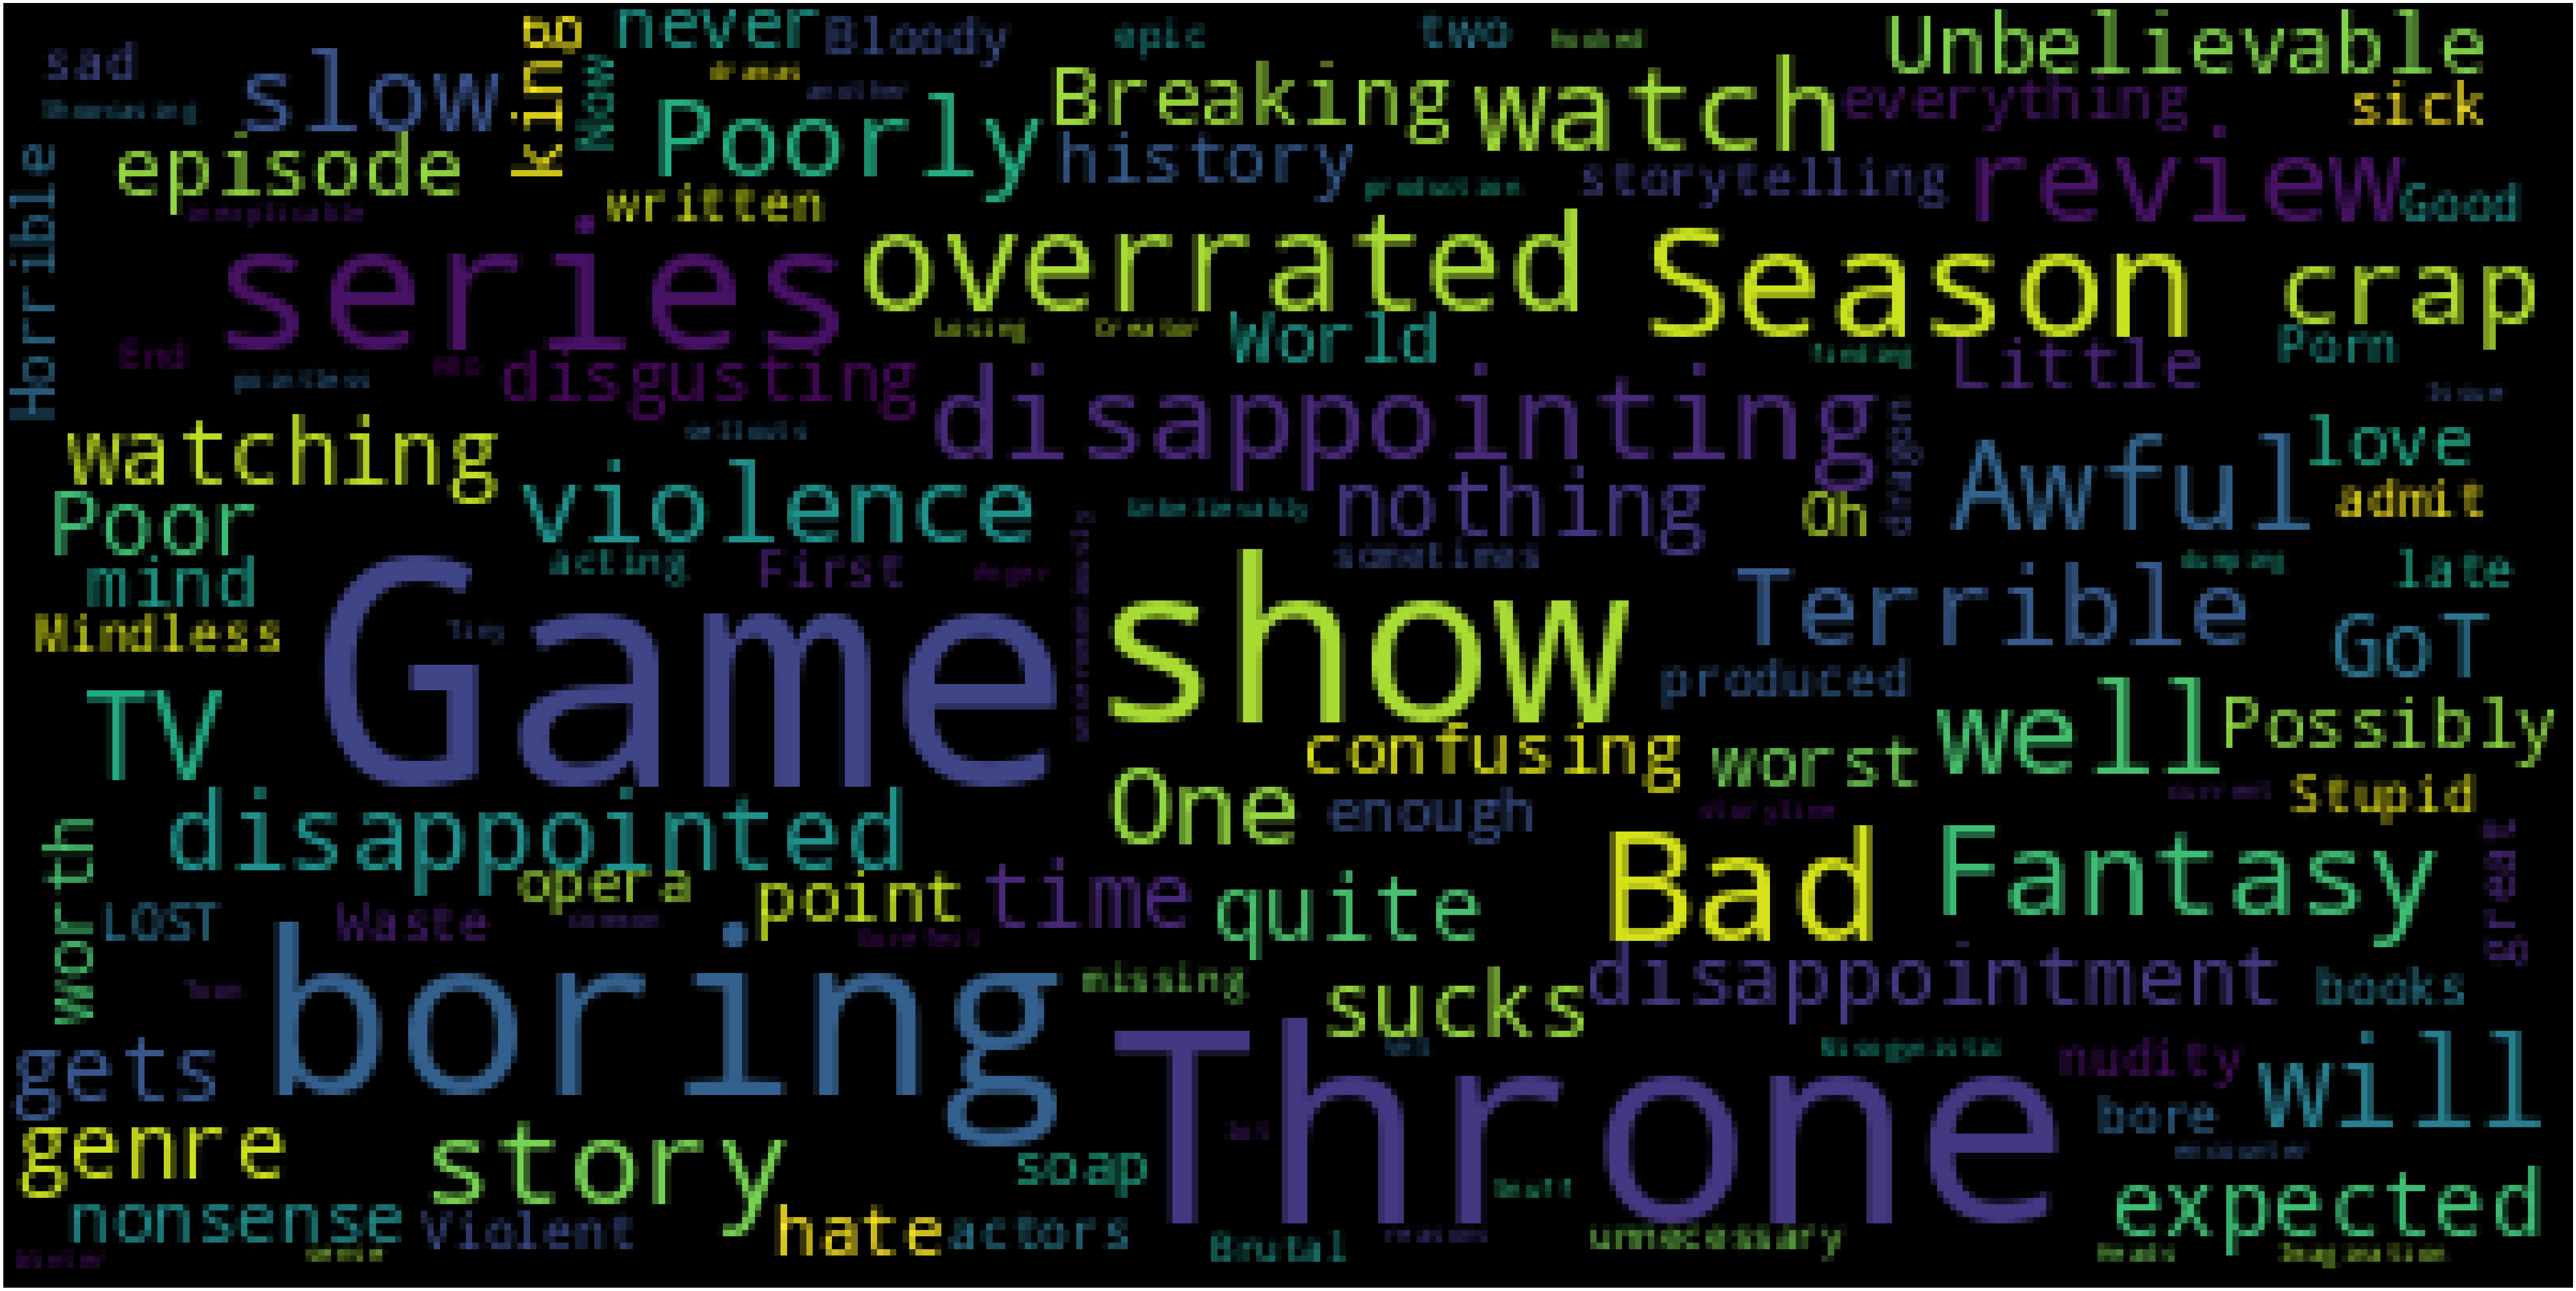

In [ ]:
wc(negative_reviews['Review'],'black','Most Used Words')

In [ ]:
import string
def text_process(review):
    nopunc=[word for word in review if word not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
test_df=test_df.dropna(axis=0,how='any')
rating_class = test_df[(test_df['Rating'] == 1) | (test_df['Rating'] == 10)]
X_review=rating_class['Review']
y=rating_class['Rating']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_review)

In [ ]:
X_review = bow_transformer.transform(X_review)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
predict=nb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, predict))
print('\n Accuracy:')
print(accuracy_score(y_test, predict))
print(classification_report(y_test, predict))

[[ 14  26]
 [ 14 159]]

 Accuracy:
0.812206572769953
              precision    recall  f1-score   support

         1.0       0.50      0.35      0.41        40
        10.0       0.86      0.92      0.89       173

    accuracy                           0.81       213
   macro avg       0.68      0.63      0.65       213
weighted avg       0.79      0.81      0.80       213



In [ ]:
rating_positive=test_df['Review'][9]
rating_positive

' This one will blow you away!'

In [ ]:
rating_postive_transformed = bow_transformer.transform([rating_positive])
nb.predict(rating_postive_transformed)[0]

10.0

In [ ]:
rating_negative=test_df['Review'][54]
rating_negative

' disgusting, overrated, pointless'

In [ ]:
rating_negative_transformed = bow_transformer.transform([rating_negative])
nb.predict(rating_negative_transformed)[0]

1.0

In [ ]:
ratings_1 = (rating_class['Rating']==1).sum()
ratings_1_indices = np.array(rating_class[rating_class.Rating == 1].index)

In [ ]:
ratings_10_indices = rating_class[rating_class.Rating == 10].index


random_normal_indices = np.random.choice(ratings_10_indices, ratings_1, replace = False)
random_normal_indices = np.array(random_normal_indices)

under_sample_indices = np.concatenate([ratings_1_indices,random_normal_indices])

In [ ]:
undersample = rating_class.loc[under_sample_indices]

X_undersample = undersample.loc[:, undersample.columns != 'Rating']
y_undersample = undersample.loc[:, undersample.columns == 'Rating']

In [ ]:
print("Percentage of 10 ratings: ", len(undersample[undersample.Rating == 10])/len(undersample))
print("Percentage of 1 ratings: ", len(undersample[undersample.Rating == 1])/len(undersample))
print("Total number of examples in resampled data: ", len(undersample))

Percentage of 10 ratings:  0.5
Percentage of 1 ratings:  0.5
Total number of examples in resampled data:  190


In [ ]:
X_review_us = X_undersample['Review']

In [ ]:
X_review_us = bow_transformer.transform(X_review_us)

In [ ]:
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_review_us, y_undersample, test_size=0.3, random_state=101)

In [ ]:
nb.fit(X_train_us, y_train_us)
predict_us=nb.predict(X_test_us)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(confusion_matrix(y_test_us, predict_us))
print('\n Accuracy:')
print(accuracy_score(y_test_us, predict_us))
print(classification_report(y_test_us, predict_us))

[[16 10]
 [ 9 22]]

 Accuracy:
0.6666666666666666
              precision    recall  f1-score   support

         1.0       0.64      0.62      0.63        26
        10.0       0.69      0.71      0.70        31

    accuracy                           0.67        57
   macro avg       0.66      0.66      0.66        57
weighted avg       0.67      0.67      0.67        57



In [ ]:
nb.fit(X_train_us, y_train_us)
predict_entire=nb.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(confusion_matrix(y_test, predict_entire))
print('\n Accuracy:')
print(accuracy_score(y_test, predict_entire))
print(classification_report(y_test, predict_entire))

[[ 34   6]
 [ 46 127]]

 Accuracy:
0.755868544600939
              precision    recall  f1-score   support

         1.0       0.42      0.85      0.57        40
        10.0       0.95      0.73      0.83       173

    accuracy                           0.76       213
   macro avg       0.69      0.79      0.70       213
weighted avg       0.86      0.76      0.78       213



In [ ]:
print(confusion_matrix(y_test, predict))
print('\n Accuracy:')
print(accuracy_score(y_test, predict))
print(classification_report(y_test, predict))

[[ 14  26]
 [ 14 159]]

 Accuracy:
0.812206572769953
              precision    recall  f1-score   support

         1.0       0.50      0.35      0.41        40
        10.0       0.86      0.92      0.89       173

    accuracy                           0.81       213
   macro avg       0.68      0.63      0.65       213
weighted avg       0.79      0.81      0.80       213

